### **Descripción de el proyecto**

El proyecto consiste en desarrollar un algoritmo de Machine Learning.
<br>A partir de una imagen de un tumor de Cervix, asigna el tipo de tratamiento que mejor funcionaría en cada caso, atendiendo a esta imagen que explica más detalladamente la clasificación.

<img src=https://storage.googleapis.com/kaggle-competitions/kaggle/6243/media/Screen%20Shot%202017-03-09%20at%205.20.01%20PM.png width="600" height="337"> 

Este proyecto se basa en una competición de Kaggle lanzada por Intel y MobileODT. <br>
Visitar <a href="https://www.kaggle.com/competitions/intel-mobileodt-cervical-cancer-screening/overview">Kaggle</a> para mas información.

### **Importación de imágenes**

Importo las imagenes de los tres tipos que tengo guardadas en sus respectivos tres ficheros. <br>
Reescalo las imagenes y las transformo a niveles de gris


In [1]:
import numpy as np
from PIL import Image
import os, sys
import cv2


x_data = []

def resizeToGray(path):
    dirs = os.listdir( path )
    for item in dirs:
        if os.path.isfile(path+item):
            im = cv2.imread(path+item, cv2.IMREAD_UNCHANGED)
            f, e = os.path.splitext(path+item)
            width = 60
            height = 60
            dim = (width, height)
            imResize = cv2.resize(im, dim, interpolation = cv2.INTER_AREA)
            imGray = cv2.cvtColor(imResize, cv2.COLOR_BGR2GRAY)
            x_data.append(imGray)

resizeToGray("E:/Clase/SI/Data/train/Type_1/")
y_type1 = np.ones((len(x_data),), dtype=int)

resizeToGray("E:/Clase/SI/Data/train/Type_2/")
y_type2 = np.full(len(x_data)-len(y_type1), 2)

resizeToGray("E:/Clase/SI/Data/train/Type_3/")
y_type3 = np.full(len(x_data)-len(y_type1)-len(y_type2), 3)

y_data = np.concatenate((y_type1, y_type2, y_type3), axis = 0)

### **Visualización de imagenes**

(<matplotlib.image.AxesImage at 0x17de9add690>, (-0.5, 59.5, 59.5, -0.5))

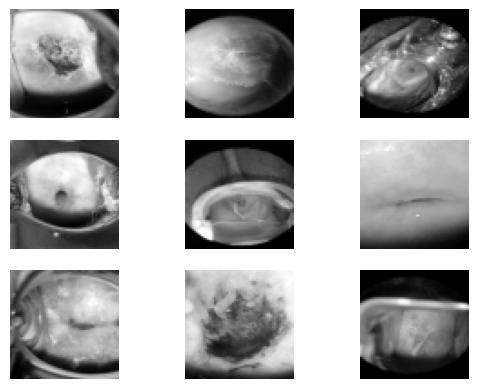

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

u1 = random.choice(x_data)
u2 = random.choice(x_data)
u3 = random.choice(x_data)
u4 = random.choice(x_data)
u5 = random.choice(x_data)
u6 = random.choice(x_data)
u7 = random.choice(x_data)
u8 = random.choice(x_data)
u9 = random.choice(x_data)

plt.subplot(331)
plt.imshow(u1, "gray"), plt.axis("off")
plt.subplot(332)
plt.imshow(u2, "gray"), plt.axis("off")
plt.subplot(333)
plt.imshow(u3, "gray"), plt.axis("off")
plt.subplot(334)
plt.imshow(u4, "gray"), plt.axis("off")
plt.subplot(335)
plt.imshow(u5, "gray"), plt.axis("off")
plt.subplot(336)
plt.imshow(u6, "gray"), plt.axis("off")
plt.subplot(337)
plt.imshow(u7, "gray"), plt.axis("off")
plt.subplot(338)
plt.imshow(u8, "gray"), plt.axis("off")
plt.subplot(339)
plt.imshow(u9, "gray"), plt.axis("off")

### **Preprocesamiento Datos**

Aplano las imagenes para poder usar los datos en el entrenamiento, pasamos de tener (1481, 60, 60) 1481 filas, con una matriz de 60x60 cada una, a (1481, 3600) 1481 filas, cada una con un array de 3600 elementos. <br>
Los clasificadores a utilizar no aceptan matrices como argumentos, por lo que "aplanamos" las imagenes y las tratamos como si fuesen vectores de una dimensión. <br>


In [4]:
import pandas as pd

x_numpy = np.array(x_data)
x_numpy = x_numpy.reshape(x_numpy.shape[0], (x_numpy.shape[1]*x_numpy.shape[2]))
df = pd.DataFrame(x_numpy)

series = pd.Series(y_data)
df["Tipo"] = series

Separo la variable objetivo de los datos.

In [5]:
Y_train = df.iloc[:, -1]
X_train = df.iloc[:,:-1]

Veo la cantidad de datos que tengo de cada tipo para poder equilibrarlos.

Tipo 1: 250
Tipo 2: 781
Tipo 3: 450
Proportion: 3:2 0.58 : 1
Proportion: 2:1 0.32 : 1
Proportion: 3:1 0.56 : 1


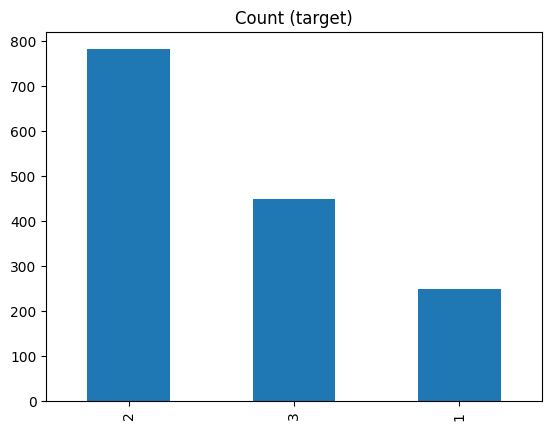

In [6]:
target_count = Y_train.value_counts()
print('Tipo 1:', target_count[1])
print('Tipo 2:', target_count[2])
print('Tipo 3:', target_count[3])
print('Proportion: 3:2', round(target_count[3] / target_count[2], 2), ': 1')
print('Proportion: 2:1', round(target_count[1] / target_count[2], 2), ': 1')
print('Proportion: 3:1', round(target_count[1] / target_count[3], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Equilibro los datos usando SMOTE, lo uso dos veces para equilibrar el tipo 1 (menor), con el tipo 2 (mayor), y luego para equilibrar el tipo 3.

Tipo 1: 781
Tipo 2: 781
Tipo 3: 781
Proportion: 2:3 1.0 : 1
Proportion: 1:2 1.0 : 1
Proportion: 1:3 1.0 : 1


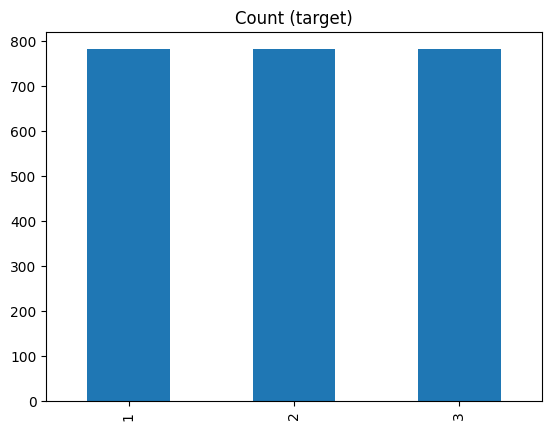

In [7]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train, Y_train)   #Para la clase minoritaria (Tipo 1)
X_sm1, y_sm1 = smote.fit_resample(X_sm, y_sm)       #Para la clase minoritaria que ya no es Tipo1 (Tipo 3)

target_count = pd.Series(y_sm1).value_counts()
print('Tipo 1:', target_count[1])
print('Tipo 2:', target_count[2])
print('Tipo 3:', target_count[3])
print('Proportion: 2:3', round(target_count[3] / target_count[2], 2), ': 1')
print('Proportion: 1:2', round(target_count[1] / target_count[2], 2), ': 1')
print('Proportion: 1:3', round(target_count[1] / target_count[3], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

Divido los datos solo para poder ver la matriz de confusión más adelante (aun que esta sea aproximada), ya que voy a usar cross_validation para entrenar el clasificador.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm1, y_sm1, test_size=0.2, random_state=0)

### **Entrenamiento**

In [9]:
from sklearn.ensemble import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()

regs = {
    "RandomForest": rf,
    "KNN": knn
}

scores = {
    "Accuracy": [],
    "AccuracyCV": []
}

for reg in regs.values():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    scores["Accuracy"].append(accuracy)
    reg.fit(X_sm1, y_sm1)
    score = np.mean(cross_val_score( reg, X_sm1, y_sm1, cv=5, scoring='f1_macro'))
    scores["AccuracyCV"].append(score)

scores = pd.DataFrame(scores, index=regs.keys())

scores

,Accuracy,AccuracyCV
RandomForest,0.582090,0.596030
KNN,0.441365,0.434265


Accuracy: 58.21%


c:\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


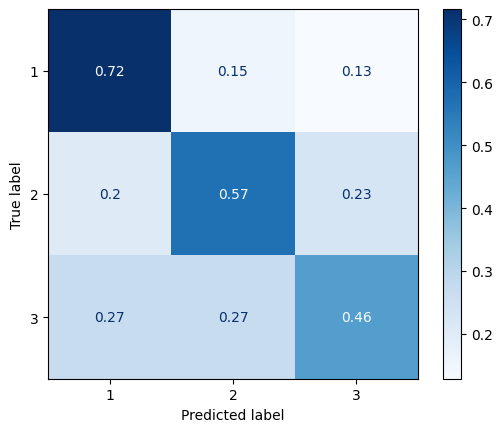

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', normalize='true')

plt.show()



In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid_rForest = {
    'bootstrap': [True, False],
    'max_depth': [None, 10, 20, 30, 40, 50, 100, 200, 500],
    'max_features': ["sqrt", "log2", None],
    'min_samples_leaf': [1, 2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ["gini", "entropy", "log_loss"],
    'n_estimators': [int(x) for x in np.linspace(10, 1000, num=100)]
}

rForest_grid = RandomizedSearchCV(
    estimator=RandomForestClassifier(), param_distributions = param_grid_rForest, n_iter=1, cv=5, n_jobs=-1, verbose=2)

rForest_grid.fit(X_sm1, y_sm1)
rForest_grid.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


<hr>

Creado por **Javier Gil** (javier.gil.rodriguez@alumnos.upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">